In [45]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime as dt,timedelta


In [2]:
from lib.tools import get_rhoinf_points, get_rhoinf_time

In [3]:
from lib import driver

ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/cpc/share/proj failed


In [4]:
LIMdriver = driver.Driver('namelist_retrospective_expected_skills.py')
LIMdriver.get_variables(read=True)

reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14CPCtemp.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14SST.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14SF750.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14SF100.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14T2m.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14SLP.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14H500.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14colIrr.p
reading  /scratch/ycheng/CPC/data_clim/5b_climo_95-14_EOF_58-14/fullyr_JRA_58-14_climo_95-14SOIL.p


In [5]:
varname='T2m'
varobj = LIMdriver.use_vars[varname]['data']
dir(varobj)
varobj.latbounds

(20, 74)

In [24]:
ds_ori = xr.open_mfdataset(f'/scratch/ycheng/CPC/Images_retrospective_8_vars_5b_climo_95-14_EOF_58-14/lim_t2m_retrospective/wk34separate_regression/T2m.2015????.nc')
# ds_new = xr.open_dataset(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Images_retrospective_test/lim_t2m_retrospective/wk34separate_regression/T2m.20150105.nc')

In [26]:
init_time = ds_ori['time']

In [76]:
def get_rhoinf_time_local(fcst,spread,varobj=None,latbounds=None,lonbounds=None):

    # lats = varobj.lat
    # lons = varobj.lon
    lats = fcst['lat']
    lons = fcst['lon']
    if latbounds is None:
        latbounds = (np.amin(lats),np.amax(lats))
    if lonbounds is None:
        lonbounds = (np.amin(lons),np.amax(lons))
    if min(lonbounds)<0:
        lons_shift = lons.copy()
        lons_shift[lons>180] = lons[lons>180]-360
        lons = lons_shift
    domain = np.where((lats>=min(latbounds)) & (lats<=max(latbounds)) & \
                      (lons>=min(lonbounds)) & (lons<=max(lonbounds)))
    # print('we are good here 1')
    # print(f'domain shape: {np.asarray(domain).shape}')

    if len(np.array(fcst).shape)<2:
        fcst = np.array(fcst).reshape(1,len(fcst))
        spread = np.array(spread).reshape(1,len(spread))
        print('we are good here 2')
    
    f2 = [f[domain]**2 for f in fcst]
    e2 = [e[domain]**2 for e in spread]

    S2 = [np.array(np.nansum(f)/np.nansum(e)) for f,e in zip(f2,e2)]
    rho_inf = np.array([s2 * ((s2+1)*s2)**-.5 for s2 in S2])
    if len(rho_inf)<2:
        rho_inf = rho_inf[0]
    return rho_inf

In [80]:
tstart=dt(2015,1,1)
print(tstart)
LT = 21
print(ds_ori['lead_time'][:])
fcst = ds_ori['T2m_anom'].sel(time=tstart).isel(lead_time=1)
dates = ds_ori['time']
lead_time = ds_ori['lead_time']
print(dates)
print(lead_time)
# 1814400000000000

2015-01-01 00:00:00
<xarray.DataArray 'lead_time' (lead_time: 2)>
array([1814400000000000, 2419200000000000], dtype='timedelta64[ns]')
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 21 days 28 days
Attributes:
    long_name:  lead time
<xarray.DataArray 'time' (time: 365)>
array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', ..., '2015-12-29T00:00:00.000000000',
       '2015-12-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
Attributes:
    long_name:      Time
    standard_name:  time
    axis:           T
<xarray.DataArray 'lead_time' (lead_time: 2)>
array([1814400000000000, 2419200000000000], dtype='timedelta64[ns]')
Coordinates:
  * lead_time  (lead_time) timedelta64[ns] 21 days 28 days
Attributes:
    long_name:  lead time


In [78]:
daily_rho = []
import warnings
warnings.filterwarnings('ignore')
for tinit in init_time:
    fcst = ds_ori['T2m_anom'].sel(time=tinit)
    spread = ds_ori['T2m_spread'].sel(time=tinit)
    rho_tmp =  get_rhoinf_time_local(fcst,spread,varobj=varobj,latbounds=varobj.latbounds,lonbounds=varobj.lonbounds)
    daily_rho.append(rho_tmp)
# plt.plot(daily_rho)


SyntaxError: invalid syntax (199155437.py, line 3)

In [82]:
ds_daily_outputs = xr.Dataset(data_vars={'rho': (('time','lead_time',), daily_rho)},
                              coords={'time': dates,'lead_time':lead_time})
ds_daily_outputs.to_netcdf('/scratch/ycheng/CPC/Images_retrospective_8_vars_5b_climo_95-14_EOF_58-14/expected_skills_2015.nc')

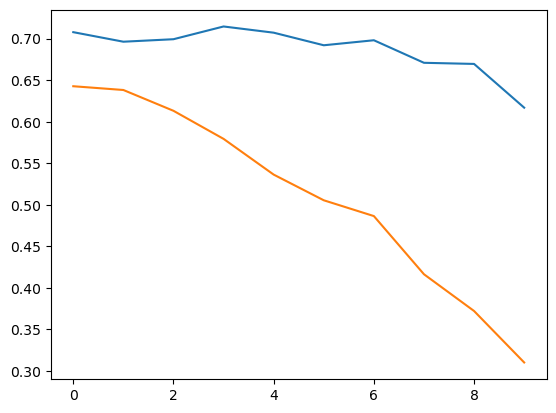

In [111]:
# expected = xr.open_dataset('/scratch/ycheng/CPC/Images_retrospective_8_vars_5b_climo_95-14_EOF_58-14/expected_skills_2015.nc')
# LT1 = expected['rho'].isel(lead_time=[:])
# print(LT1)
# LT1.plot()
plt.plot(daily_rho[0:10])


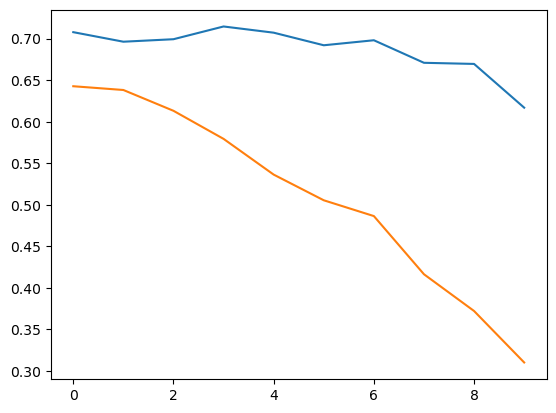

In [110]:
ds_new = xr.open_mfdataset(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/Images_retrospective_test/lim_t2m_retrospective/wk34separate_regression/T2m.2015????.nc')
init_time = ds_new['time']
daily_rho_new = []
import warnings
warnings.filterwarnings('ignore')
for tinit in init_time:
    fcst = ds_new['FMAP_masked'].sel(time=tinit)
    spread = ds_new['EMAP_masked'].sel(time=tinit)
    rho_tmp =  get_rhoinf_time_local(fcst,spread,varobj=varobj,latbounds=varobj.latbounds,lonbounds=varobj.lonbounds)
    daily_rho_new.append(rho_tmp)
plt.plot(daily_rho_new)

In [27]:
# fcst = ds['T2m_anom']
# spread = ds['T2m_spread']

# fcst = ds_new['FMAP_masked']
# spread = ds_new['EMAP_masked']
# # fcst['lon']
# # print(spread[0][0:10][:])
# spread[0].plot(levels = np.arange(-5,6,1))

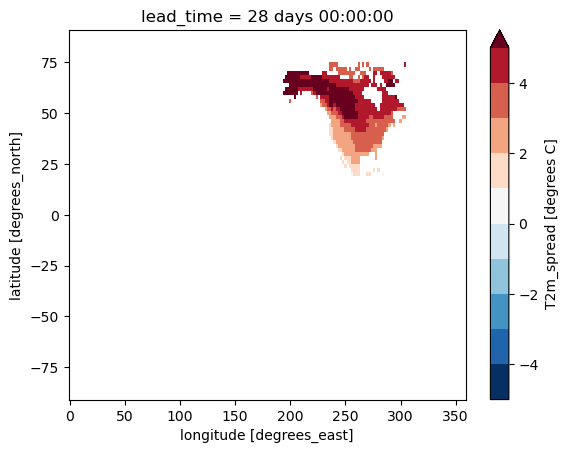

In [15]:
spread[1].plot(levels = np.arange(-5,6,1))